# Chapitre 3 : Prétraitement des données

In [2]:
import numpy as np 
import csv
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(color_codes = True)
sns.set(font_scale=1.5) # fixe la taille de la police à 1.5 * 12pt
from scipy import stats

**Chargement du jeu de données IMdB non prétraité** 

In [3]:
DATA = pd.read_csv('../DATA/movie_metadata_dirty.csv', delimiter = ';', index_col = 'movie_title')

# DATA.head(n = 10)

## 1. Recueil des données

Lorsque l'on traite des données, il est important de connaître les conditions dans lesquelles a eu lieu le recueil des données : 
* quelle est la source des données ? (capteurs, échantillons de la population, etc)
* source unique ou sources multiples ? 
* les données sont-elles fiables ? (précision du capteur, degré de certitude de la personne interrogée, etc)
* les données ont-elles été préalablement sélectionnées ? (catégorie restreinte de la population, sélection d'une partie seulement des données enregistrées)

Toutes les réponses à ces questions peuvent influencer les analyses que l'on fera à partir des données.

<span style="color: #27AE60"> **Exemple :** </span> Tous les films n'ont pas été notés par le même nombre d'utilisateurs, les scores obtenus sont-ils vraiment comparables ? Y a-t-il des biais possibles ? 

**Notions non abordées dans ce cours :**

* Stockage des données (format, modalité de stockage et d'accès, confidentialité des données)
* Ethique de la donnée : qu'a-t-on le droit (juridiquement) de faire avec les données. 

## 2. Préparation des données

### 2.1. Pourquoi préparer les données

* homogénéisation des données : données provenant potentiellement de différentes sources, données collectées à différents moments, différents lieux, etc,
* traiter les les valeurs aberrantes, manquantes, mettre à l'échelle toutes les données, etc, 
* transformation des données : 
    * cas de l'analyse de données qualitatives : binarisation des données/classification 
    * cas de l'analyse de données textuelles (tokenisation, suppression des mots sans information, lemmatisation, etc)

C'est un travail qui peut se révéler long et fastidieux mais qui est nécessaire pour que les analyses soient correctes par la suite. Ce n'est pas forcément facile à automatiser, c'est pourquoi le traiteur de données doit **visualiser** et vérifier les données avant de les traiter.

### 2.2. Exemple de problèmes possibles liés au processus de collecte des données

Voici une liste non-exhaustive des défauts que l'on peut rencontrer lors de la collecte des données ciblées :

* panne d'un appareil de mesure ou bug d'un logiciel d'acquisition
* utilisateurs qui ne souhaitent pas communiquer certaines informations pour protéger leur vie privée ou pour des raisons de condentialité. Dans ce cas, les utilisateurs peuvent soit ne pas remplir certains champs, soit les remplir avec n'importe quoi ("cgegege" à la place de leur nom de famille), soit faire un choix par défaut (par exemple, sélectionner la première valeur dans une liste déroulante). 
* utilisateurs qui donnent intentionnellement des valeurs incorrectes (par exemple pour leur date de naissance)
* erreurs lors de la saisie manuelle des données : faute de frappe par exemple (la personne entre la valeur 89.34 au lieu de 8.934)
* coût de la collecte de certaines données, qui fait qu'elles ne sont pas toujours collectées dans la totalité
* incohérences dans les données provenant de différentes sources : dans une source, le prénom des personnes peut être indiqué en entier et dans l'autre on ne trouve que l'initiale du prénom
* modification du processus de collecte des données (par exemple, ajout de champs supplémentaires)

*Sources :*
* "Data Mining : The Textbook", Charu C. Aggarwal, Springer, 2015.
* "Principles of Data Mining", Max Bramer, Springer, 2016.

### 2.3. Cas des défauts de données les plus courants

#### A) Données incomplètes/manquantes

On appelle données incomplètes des données dans lesquelles certaines variables sont non renseignées pour certains individus. Cela se traduit par une absence de valeurs dans le tableau de données ou la présence de 'Nan' (*not a number*) qui peuvent être problématiques lors des analyses (calcul de moyenne, variance, etc).


$\rightarrow$ La plupart des langages de programmation traite les Nan comme des valeurs infinies !


#### B) Données aberrantes

On appelle données aberrantes des valeurs qui contrastent énormément avec le reste des données recueillies pour une variable donnée. Elles peuvent être dues aux conditions d'acquisition qui ont brusquement changé, à des erreurs de transcription, de transmission, etc.

<span style="color: #27AE60"> **Exemples :** </span>
* Les données incorrectes peuvent être détectées à l'aide des connaissances du domaine. Par exemple, si le poids indiqué pour une personne est de 3000kg, c'est certainement une erreur ! 
* De la même manière si le pays indiqué est "France" et que dans la colonne ville on trouve "Düsseldorf", il y a certainement une erreur.

Attention toutefois : tous les points de données qui ne sont pas cohérents avec la distribution des données restantes ne sont pas forcément à considérer comme des erreurs. Par exemple, si vous manipulez des données bancaires et qu'un enregistrement aberrant correspond à une fraude à la carte bancaire, il ne devrait pas être supprimé. Il est certes susceptible d'être incohérent par rapport aux tendances observées pour le reste des données (normales), mais ne constitue pas une erreur pour autant. Dans ce type de situation, il faut regarder les valeurs de plus près avant de les supprimer ou d'appliquer une éventuelle correction.

#### C) Doublons

Lors de la collecte des données, notamment en cas de sources multiples, il peut apparaître des doublons. Afin de ne pas fausser les analyses, il est impératif de supprimer les doublons. 

<span style="color: #27AE60"> **Exemple :** </span> Parmi les 100 premiers individus de la base de films se trouvent des doublons. 

### 2.4. Nettoyage des données en pratique

#### A) Cas des données incomplètes/manquantes

Dans le cas des données incomplètes, le nettoyage des données pourra se faire des manières suivantes :
    
- suppression des individus pour lesquels il manque des données, 

- imputation de données manquantes (le processus d'estimation des données manquantes est également appelé imputation): <br>
     - **données quantitatives :** remplacement de la valeur manquante par la valeur moyenne ou médiane de la variable correspondante, <br>
     - **données temporelles/chronologiques :** remplacement par la valeur précédente ou suivante, ou interpolation, <br>
     - **données qualitatives :** remplacement par la modalité la plus représentée dans le jeu de données.
                                    
- possibilité de créer une variable binaire supplémentaire 'conforme/non conforme' qui servira de filtre pour les différentes analyses (cela permet de ne pas effacer les quelques mesures effectuées sur l'individu qui peuvent servir aux analyses univariées).

<span style="color: #27AE60"> **Exemple :** </span> Suppression des individus dont au moins une valeur est manquante. Par exemple, le budget et le score du film Forrest Gump sont manquantes dans DATA. 

In [12]:
df = DATA.dropna(how = 'any') # supprime les lignes contenant des nan pour toutes les variables du df
# df.head(n = 10)

<span style="color: #27AE60"> **Exemple :** </span> Remplacement des données manquantes par la valeur médiane d'une variable (par exemple le budget)

In [13]:
df = DATA.copy()
df.budget=df["budget"].fillna(df.budget.median())
# df.head(n=10)

**Inconvénients des approches**

* La suppression des individus pour lesquels il manque des données n'est pas adaptée lorsque c'est le cas de la plupart des individus.
* L'imputation des données manquantes peut affecter le reste du processus d'analyse des données
* Le remplacement par la modalité la plus représentée peut se justifier si les proportions des valeurs possibles sont déséquilibrées, et qu'une modalité est clairement beaucoup plus fréquente que les autres. Par contre, si les valeurs sont réparties plus uniformément, la validité de cette approche est beaucoup moins claire.

#### B) Cas des valeurs aberrantes

Dans le cas des valeurs aberrantes, on prendra les dispositions suivantes :

* pour l'analyse de type 'détection d'anomalies' il faut conserver les valeurs aberrantes,
* si l'on s'intéresse au comportement moyen de la population avec un nombre d'individus pas très élevé, 
il peut être intéressant de supprimer les individus aberrants pour calculer les statistiques de la population.

<span style="color: #27AE60"> **Exemple :** </span>  Détecter des valeurs aberrantes dans un jeu de données

In [6]:
DATA = pd.read_csv('../DATA//movie_metadata_dirty.csv', delimiter = ';', index_col = 'movie_title')

DATA.describe() # permet d'observer s'il y a des valeurs aberrantes
# describe sert à calculer les statistiques descriptives des variables numériques du df

,num_critic_for_reviews,duration,num_voted_users,facenumber_in_poster,num_user_for_reviews,budget,title_year,imdb_score
count,4123.000000,4068.000000,4.110000e+03,4135.000000,4129.000000,4.077000e+03,4135.000000,4094.000000
mean,152.702886,109.285398,9.643713e+04,1.370254,306.101720,3.463681e+07,2002.048609,6.418051
std,122.608321,22.432477,1.507161e+05,2.027755,401.708685,4.109229e+07,12.064546,1.106012
min,1.000000,20.000000,6.000000e+00,0.000000,1.000000,1.100000e+03,1916.000000,1.600000
25%,63.000000,95.000000,1.362650e+04,0.000000,89.000000,7.840000e+06,1998.000000,5.800000
50%,123.000000,105.000000,4.409750e+04,1.000000,184.000000,2.000000e+07,2005.000000,6.500000
75%,209.000000,119.000000,1.128665e+05,2.000000,365.000000,4.500000e+07,2010.000000,7.200000
max,813.000000,330.000000,1.689764e+06,43.000000,5060.000000,3.000000e+08,2016.000000,9.300000


La fonction `describe` vue dans le chapitre 2 résume toutes les représentations numériques pour les variables quantitatives. En comparant les valeurs moyennes et les valeurs min et max, cela permet de détecter éventuellement quelques valeurs aberrantes. On peut compléter par des représentations graphiques de certaines variables. 

#### C) Suppression des doublons

Les doublons sont des lignes dupliquées parfaitement identiques: deux lignes dont une seule valeur diffère sont considérées comme différentes.

In [7]:
df_clean = DATA.drop_duplicates() # supprime les lignes dupliquées
df_clean.head(n=10)

,director_name,num_critic_for_reviews,duration,actor_1_name,actor_2_name,num_voted_users,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score
movie_title,,,,,,,,,,,,,,
The Shawshank Redemption,Frank Darabont,199.0,142.0,Morgan Freeman,Jeffrey DeMunn,1689764.0,0,4144.0,English,USA,R,NaN,1994,9.3
The Dark Knight,Christopher Nolan,645.0,152.0,Christian Bale,Heath Ledger,1676169.0,0,4667.0,English,USA,PG-13,185000000.0,2008,9.0
Inception,Christopher Nolan,642.0,148.0,Leonardo DiCaprio,Tom Hardy,1468200.0,0,2803.0,English,USA,PG-13,160000000.0,2010,8.8
Fight Club,David Fincher,315.0,151.0,Brad Pitt,Meat Loaf,1347461.0,2,2968.0,English,USA,R,63000000.0,1999,8.8
Pulp Fiction,Quentin Tarantino,215.0,178.0,Bruce Willis,Eric Stoltz,1324680.0,1,2195.0,English,USA,R,8000000.0,1994,8.9
Forrest Gump,Robert Zemeckis,149.0,142.0,Tom Hanks,Siobhan Fallon Hogan,1251222.0,0,1398.0,English,USA,PG-13,NaN,1994,NaN
The Lord of the Rings: The Fellowship of the Ring,Peter Jackson,297.0,NaN,Christopher Lee,Orlando Bloom,1238746.0,2,5060.0,NaN,New Zealand,PG-13,93000000.0,2001,8.8
The Matrix,Lana Wachowski,313.0,136.0,Keanu Reeves,Marcus Chong,1217752.0,3,3646.0,English,USA,R,63000000.0,1999,8.7
The Lord of the Rings: The Return of the King,Peter Jackson,328.0,192.0,Orlando Bloom,Billy Boyd,1215718.0,2,3189.0,English,USA,PG-13,94000000.0,2003,8.9


## 3. Mise en forme des données

### 3.1. Transformation de variables qualitatives en variables numériques

<span style="color: #27AE60"> **Exemple :** </span> Transformation d'une variable qualitative en variable quantitative. 

In [8]:
liste_rating = ['Approved','G', 'PG', 'PG-13', 'R', 'NC-17', 'Not rated', 'Passed', 'M']
dico = {}
for i, rate in enumerate(liste_rating):
    dico[rate] = i
print(dico)
DATA_modif = DATA.copy()

# associe à chaque valeur de la variable content_rating une valeur numérique venant de la liste liste_rating
DATA_modif["numeric_content_rating"] = DATA["content_rating"].map(dico) 
DATA_modif.head(n=10)

{'Approved': 0, 'G': 1, 'PG': 2, 'PG-13': 3, 'R': 4, 'NC-17': 5, 'Not rated': 6, 'Passed': 7, 'M': 8}


,director_name,num_critic_for_reviews,duration,actor_1_name,actor_2_name,num_voted_users,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score,numeric_content_rating
movie_title,,,,,,,,,,,,,,,
The Shawshank Redemption,Frank Darabont,199.0,142.0,Morgan Freeman,Jeffrey DeMunn,1689764.0,0,4144.0,English,USA,R,NaN,1994,9.3,4.0
The Dark Knight,Christopher Nolan,645.0,152.0,Christian Bale,Heath Ledger,1676169.0,0,4667.0,English,USA,PG-13,185000000.0,2008,9.0,3.0
The Dark Knight,Christopher Nolan,645.0,152.0,Christian Bale,Heath Ledger,1676169.0,0,4667.0,English,USA,PG-13,185000000.0,2008,9.0,3.0
Inception,Christopher Nolan,642.0,148.0,Leonardo DiCaprio,Tom Hardy,1468200.0,0,2803.0,English,USA,PG-13,160000000.0,2010,8.8,3.0
Fight Club,David Fincher,315.0,151.0,Brad Pitt,Meat Loaf,1347461.0,2,2968.0,English,USA,R,63000000.0,1999,8.8,4.0
Pulp Fiction,Quentin Tarantino,215.0,178.0,Bruce Willis,Eric Stoltz,1324680.0,1,2195.0,English,USA,R,8000000.0,1994,8.9,4.0
Forrest Gump,Robert Zemeckis,149.0,142.0,Tom Hanks,Siobhan Fallon Hogan,1251222.0,0,1398.0,English,USA,PG-13,NaN,1994,NaN,3.0
The Lord of the Rings: The Fellowship of the Ring,Peter Jackson,297.0,NaN,Christopher Lee,Orlando Bloom,1238746.0,2,5060.0,NaN,New Zealand,PG-13,93000000.0,2001,8.8,3.0
The Matrix,Lana Wachowski,313.0,136.0,Keanu Reeves,Marcus Chong,1217752.0,3,3646.0,English,USA,R,63000000.0,1999,8.7,4.0


### 3.2. Centrage et réduction des données

Soient les données suivantes au sujet de villes françaises : heures d'ensoleillement, température moyenne et population.

| Ville  | Ensoleillement  | Température  | Population  |
|:-:|:-:|:-:|:-:|
| Ajaccio  | 2790  |  14.7 |  70700 |
| Lyon  |  2072 | 11.4  |  516000 |
| Marseille  | 2763  | 14.2  |  863000 |
|  Brest | 1729  | 10.8  |  140000 |
| Lille  |  1574 | 9.7  |  233000 |
| Paris  | 1833  |  11.2 |  2188000 |
| Strasbourg  | 1685  | 9.7  | 281000  |


On constate que les différentes variables ont des échelles de référence très différentes et ne sont pas directement comparables entre elles. Ainsi, la population a une plage de valeurs bien plus grande que l'ensoleillement, qui lui même a une plus grande plage de valeurs que la température moyenne.

**Distance entre deux individus :** 

Une manière de comparer ces villes, pour savoir lesquelles sont les plus proches du point de vue des caractèristiques à notre disposition, est d'utiliser une mesure de distance. Une distance fréquemment utilisée est la distance euclidienne, qui se calcule de la manière suivante :
$d(a,b) = \sqrt{(a_1 - b_1)^2 + (a_2 - b_2)^2 + ... + (a_n - b_n)^2} $

Utilisons cette formule pour calculer la distance entre Ajaccio et Brest et entre Ajaccio et Marseille :
* $d($Ajaccio, Brest$) = \sqrt{(2790 - 1729)^2 + (14.7-10.8)^2 + (70700 - 140000)^2} = 69308 $
* $d($Ajaccio, Marseille$) = \sqrt{(2790 - 2763)^2 + (14.7-14.2)^2 + (70700 - 863000)^2} = 6792300 $

La distance euclidienne entre Ajaccio et Marseille est bien plus importante que celle entre Ajaccio et Brest, même si les deux villes sont plus proches de par leur ensoleillement et leur température moyenne : le résultat est dominé par la variable de plus grande magnitude, la population. Ainsi, la proximité entre villes sera déterminée uniquement en fonction de leur population, les autres attributs jouant un rôle négligeable.

Or les unités utilisées sont arbitraires : on aurait tout aussi bien pu mesurer l'ensoleillement en minutes, ou la population en milliers de personnes par exemple. Ces unités ne devraient donc pas affecter la comparaison des villes.

Afin d'éviter ce type de problèmes, on peut normaliser les données, ce qui consiste à centrer et réduire les variables. L'objectif est d'obtenir des plages de valeurs comparables pour les différentes variables, en les normalisant de manière à ce qu'elles aient une moyenne nulle et une variance de 1.

On utilise pour cela la formule suivante (z-score ) :

$ z_i = \frac{x_i - \mu}{\sigma}$ 

où $x_i$ est la valeur de la variable $X$ pour l'individu $i$ $\mu$ est la moyenne de la variable $X$ et $\sigma$ est l'écart type.

Après calcul de ce score, les valeurs supérieures à la moyenne deviennent positives et celles inférieures à la moyenne deviennent négatives.

Text(0.5, 1.0, 'Variables centrées-réduites')

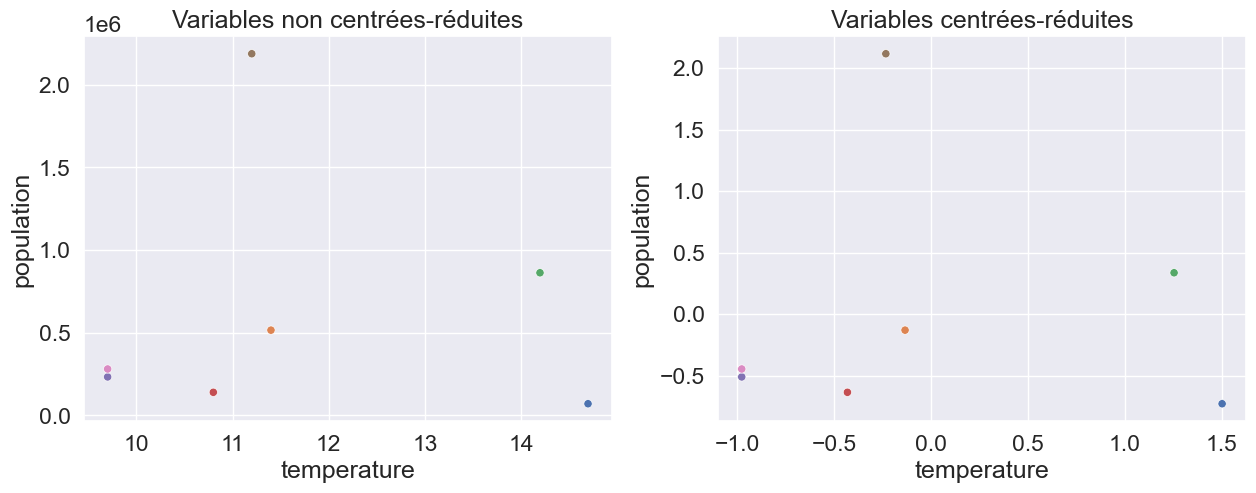

In [9]:
df_cities = pd.DataFrame(
    [['Ajaccio', 2790, 14.7, 70700],
    ['Lyon', 2072, 11.4, 516000],
    ['Marseille', 2763, 14.2, 863000],
    ['Brest', 1729, 10.8, 140000],
    ['Lille', 1574, 9.7, 233000],
    ['Paris', 1833, 11.2, 2188000],
    ['Strasbourg', 1685, 9.7, 281000]],
    columns=['city', 'sunshine', 'temperature', 'population'])

df_cities.set_index('city', inplace=True) 
df_cities.head()

df_cities_norm = (df_cities - df_cities.mean(axis = 0))/df_cities.std(axis = 0)
df_cities_norm.head()

plt.figure(figsize = (15,5))
plt.subplot(121)
sns.scatterplot(x = 'temperature', y = 'population', data=df_cities, hue = df_cities.index, legend = False, palette='deep')
plt.title('Variables non centrées-réduites')
plt.subplot(122)
sns.scatterplot(x = 'temperature', y = 'population', data=df_cities_norm, hue = df_cities_norm.index, legend = False, palette='deep')
plt.title('Variables centrées-réduites')

**Impact sur la distance euclidienne :** 

In [10]:
df_cities_norm

print("distance entre Ajaccio et Brest", np.linalg.norm(df_cities_norm.loc['Ajaccio']-df_cities_norm.loc['Brest']))
print("distance entre Ajaccio et Marseille", np.linalg.norm(df_cities_norm.loc['Ajaccio']-df_cities_norm.loc['Marseille']))

distance entre Ajaccio et Brest 2.8399618979643524
distance entre Ajaccio et Marseille 1.0941002276011091


**Résumé :**
Lorsque qu'on travaille avec des données quantitatives multivariées, il peut être intéressant de centrer et réduire les données, c'est-à-dire ramener la moyenne à 0 et la variance à 1 pour chacune des variables. 

*Intérêt du centrage des données :*
* les variables sont à moyennes nulles $\rightarrow$ avantage calculatoire (variance, corrélation, etc),
* l'origine du repère est placé au centre du nuage de points.

*Intérêt de la réduction des données :*
* permet de travailler sans unité (ou unité arbitraire),
* la dispersion du nuage de points est la même selon tous les axes/variables.

Text(0.5, 1.0, 'Variables centrées-réduites')

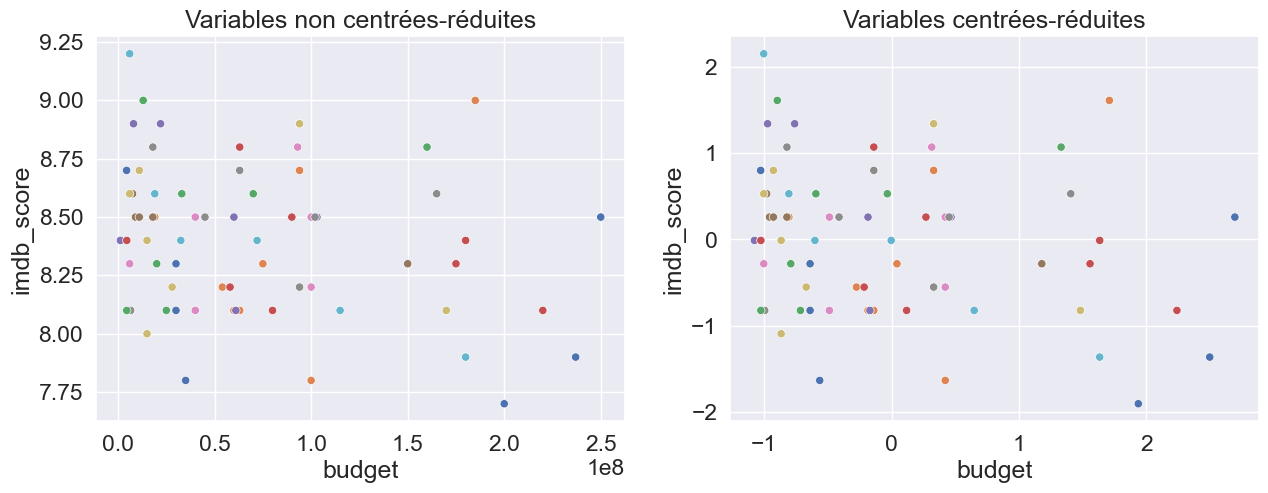

In [11]:
df = pd.DataFrame(DATA.head(n=80), columns=['imdb_score', 'budget'])
df2 = (df - df.mean(axis = 0))/df.std(axis = 0)
plt.figure(figsize = (15,5))
plt.subplot(121)
sns.scatterplot(x = 'budget', y = 'imdb_score', data=df, hue = df.index, legend = False, palette='deep')
plt.title('Variables non centrées-réduites')
plt.subplot(122)
sns.scatterplot(x = 'budget', y = 'imdb_score', data=df2, hue = df.index, legend = False, palette='deep')
plt.title('Variables centrées-réduites')

**Remarque :** cela ne modifie pas la relation entre les deux variables, les points du nuage sont toujours répartis de façon similaire 



# Ressources complémentaires : 



https://www.math.univ-toulouse.fr/~besse/Wikistat/pdf/st-tutor2-python-pandas.pdf

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5079093/ 

http://www.martingrandjean.ch/nobel-chocolate-correlation/